In [1]:
import mlflow
import pandas as pd

In [2]:
df = pd.read_csv("medical_insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# Data Preprocessing
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
label_encoders = {}

for col in ['sex', 'smoker', 'region']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le 

# Feature Engineering - BMI category
def bmi_category(bmi):
    if bmi < 18.5:
        return 'underweight'
    elif 18.5 <= bmi < 25:
        return 'normal'
    elif 25 <= bmi < 30:
        return 'overweight'
    else:
        return 'obese'

# Add new column
df['bmi_category'] = df['bmi'].apply(bmi_category)

# One-hot encode bmi_category
df = pd.get_dummies(df, columns=['bmi_category'], drop_first=True)

# Add interaction terms
df['age_smoker'] = df['age'] * df['smoker']
df['bmi_smoker'] = df['bmi'] * df['smoker']
df['age_bmi'] = df['age'] * df['bmi']

# Final preview
print(df.head())
df.to_csv("medical insurance_cleaned.csv")

   age  sex     bmi  children  smoker  region      charges  \
0   19    0  27.900         0       1       3  16884.92400   
1   18    1  33.770         1       0       2   1725.55230   
2   28    1  33.000         3       0       2   4449.46200   
3   33    1  22.705         0       0       1  21984.47061   
4   32    1  28.880         0       0       1   3866.85520   

   bmi_category_obese  bmi_category_overweight  bmi_category_underweight  \
0               False                     True                     False   
1                True                    False                     False   
2                True                    False                     False   
3               False                    False                     False   
4               False                     True                     False   

   age_smoker  bmi_smoker  age_bmi  
0          19        27.9  530.100  
1           0         0.0  607.860  
2           0         0.0  924.000  
3           0         

## EDA Questions for Analysis
### 1. Univariate Analysis (Single Variable):

What is the distribution of medical insurance charges?

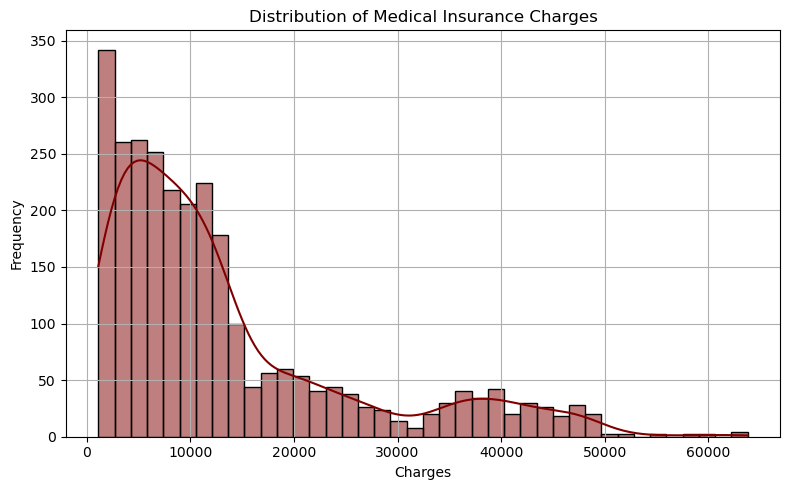

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['charges'], kde=True, bins=40, color='maroon')
plt.title("Distribution of Medical Insurance Charges")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

##### Interpretation:
This shows how skewed the charges are — typically long right tail (a few people pay much more).

What is the age distribution of the individuals?

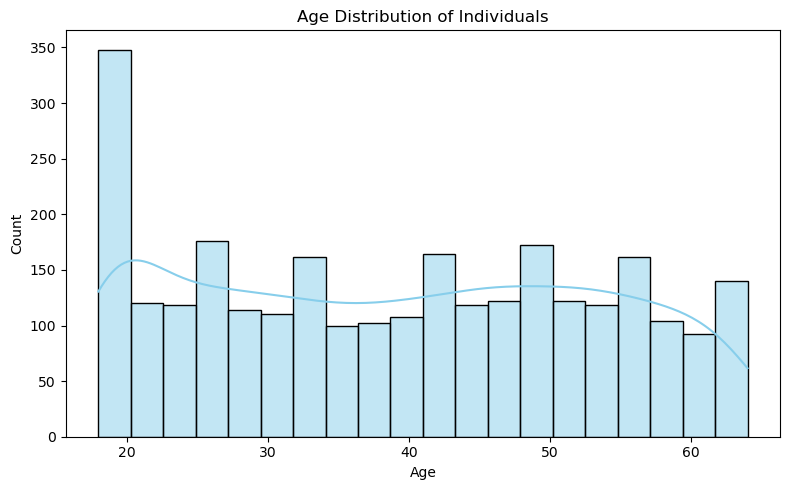

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], kde=True, bins=20, color='skyblue')
plt.title("Age Distribution of Individuals")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

##### Interpretation:
Tells you if the dataset is biased toward younger/older age groups.

How many people are smokers vs non-smokers?

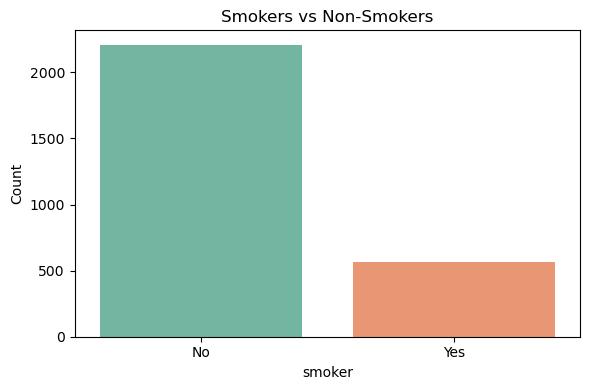

In [101]:
plt.figure(figsize=(6, 4))
sns.countplot(x='smoker', hue='smoker', data=df, palette='Set2', legend=False)
plt.title("Smokers vs Non-Smokers")
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.ylabel("Count")
plt.tight_layout()
plt.show()

What is the average BMI in the dataset?

 Average BMI: 30.70


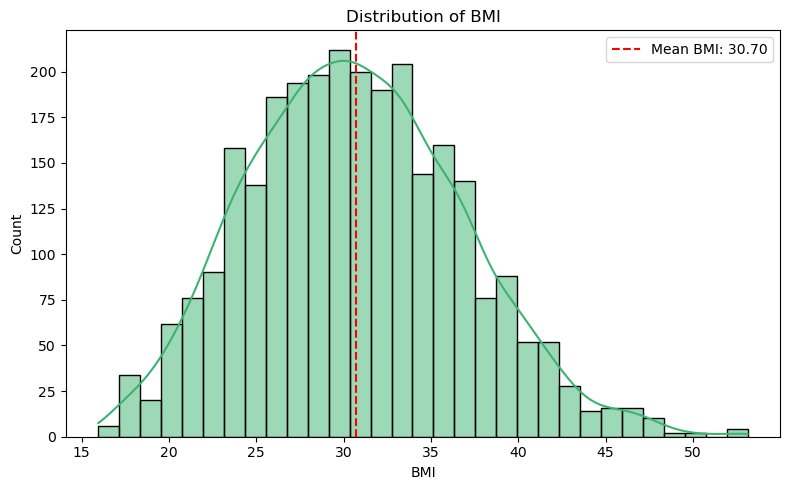

In [13]:
mean_bmi = df['bmi'].mean()
print(f" Average BMI: {mean_bmi:.2f}")

plt.figure(figsize=(8, 5))
sns.histplot(df['bmi'], kde=True, color='mediumseagreen')
plt.axvline(mean_bmi, color='red', linestyle='--', label=f"Mean BMI: {mean_bmi:.2f}")
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.legend()
plt.tight_layout()
plt.show()

Which regions have the most number of policyholders?

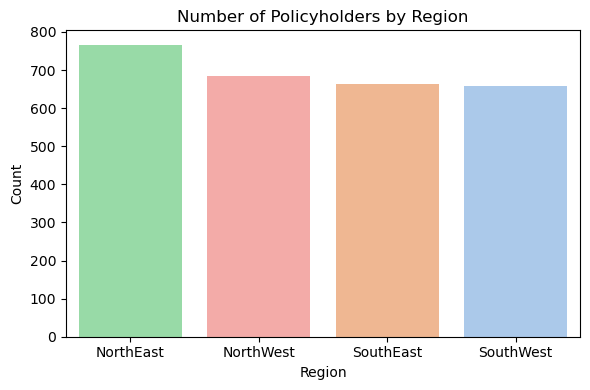

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(
    x='region',
    hue='region',
    data=df,
    order=df['region'].value_counts().index,
    palette='pastel',
    legend=False  
)
plt.title("Number of Policyholders by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1, 2, 3], labels=["NorthEast", "NorthWest", "SouthEast", "SouthWest"])
plt.tight_layout()
plt.show()

### 2. Bivariate Analysis (Two Variables):
How do charges vary with age?

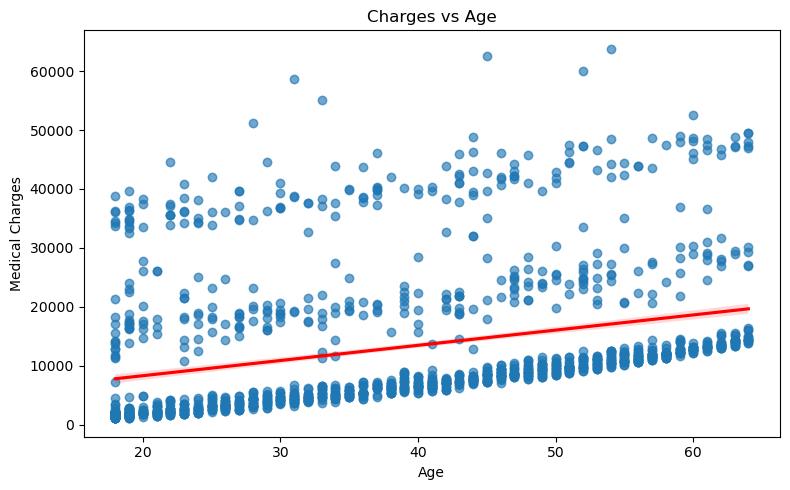

In [17]:
plt.figure(figsize=(8, 5))
sns.regplot(x='age', y='charges', data=df, scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title("Charges vs Age")
plt.xlabel("Age")
plt.ylabel("Medical Charges")
plt.tight_layout()
plt.show()

##### Interpretation:
Hows general trend: charges increase with age, especially for smokers.

Is there a difference in average charges between smokers and non-smokers?

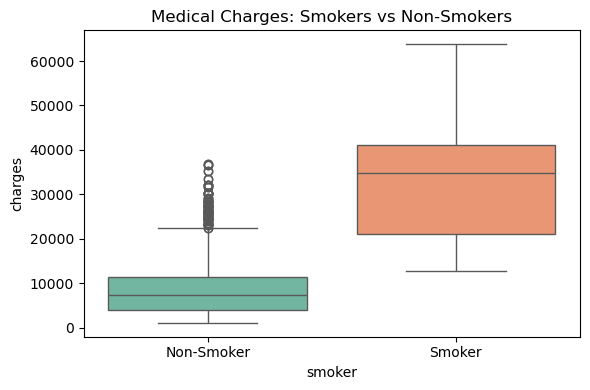

In [19]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='smoker', y='charges', data=df, hue='smoker', palette='Set2', legend=False)
plt.xticks([0, 1], ['Non-Smoker', 'Smoker'])
plt.title("Medical Charges: Smokers vs Non-Smokers")
plt.tight_layout()
plt.show()

##### Interpretation:
Smokers pay significantly more on average.

Does BMI impact insurance charges?

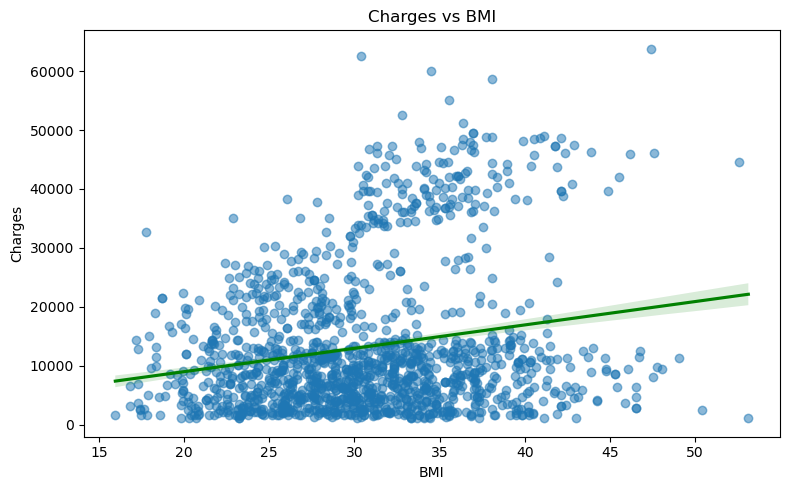

In [21]:
plt.figure(figsize=(8, 5))
sns.regplot(x='bmi', y='charges', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'green'})
plt.title("Charges vs BMI")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.tight_layout()
plt.show()

##### Interpretation:
Small positive correlation. Can be stronger for smokers (explored in multivariate).

Do men or women pay more on average?

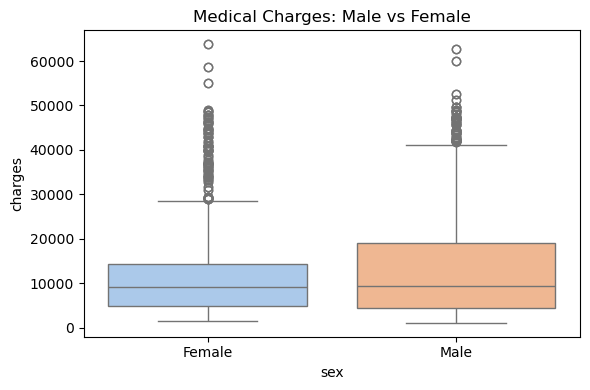

In [23]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='sex', y='charges', data=df, hue='sex', palette='pastel', legend=False)
plt.xticks([0, 1], ['Female', 'Male'])
plt.title("Medical Charges: Male vs Female")
plt.tight_layout()
plt.show()

In [25]:
gender_charges = df.groupby('sex')['charges'].mean()
abs_diff = abs(gender_charges[1] - gender_charges[0])
print(f"Average difference in charges (Male - Female): ₹{abs_diff:.2f}")

Average difference in charges (Male - Female): ₹1527.04


In [27]:
# Statistical Test
from scipy.stats import ttest_ind

male_charges = df[df['sex'] == 1]['charges']
female_charges = df[df['sex'] == 0]['charges']

t_stat, p_value = ttest_ind(male_charges, female_charges)
print(f"T-statistic: {t_stat:.3f}, p-value: {p_value:.3f}")

T-statistic: 3.314, p-value: 0.001


- If p-value > 0.05: No significant difference means the difference in average charges between men and women is statistically significant.
- If p-value <= 0.05: Statistically significant difference. You can reject the null hypothesis that "both genders have the same mean charges".
  
##### Interpretation:
Men and women show a statistically significant difference in average medical charges (p = 0.001), with men paying about ₹1,500 more on average.

Is there a correlation between number of children and charges?

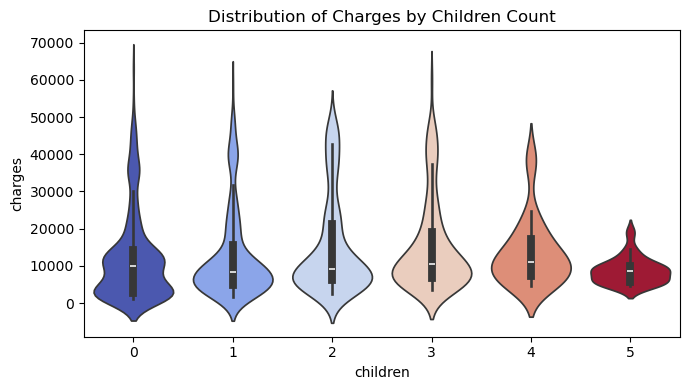

In [29]:
plt.figure(figsize=(7, 4))
sns.violinplot(x='children', y='charges', hue='children', data=df, palette='coolwarm', legend=False )
plt.title("Distribution of Charges by Children Count")
plt.tight_layout()
plt.show()

In [31]:
corr = df['children'].corr(df['charges'])
print(f"Correlation between number of children and charges: {corr:.4f}")

Correlation between number of children and charges: 0.0664


##### Interpretation:
- Correlation = 0.067  very weak positive correlation
- In practical terms: As number of children increases, charges do not significantly change

### 3. Multivariate Analysis
How does smoking status combined with age affect medical charges?

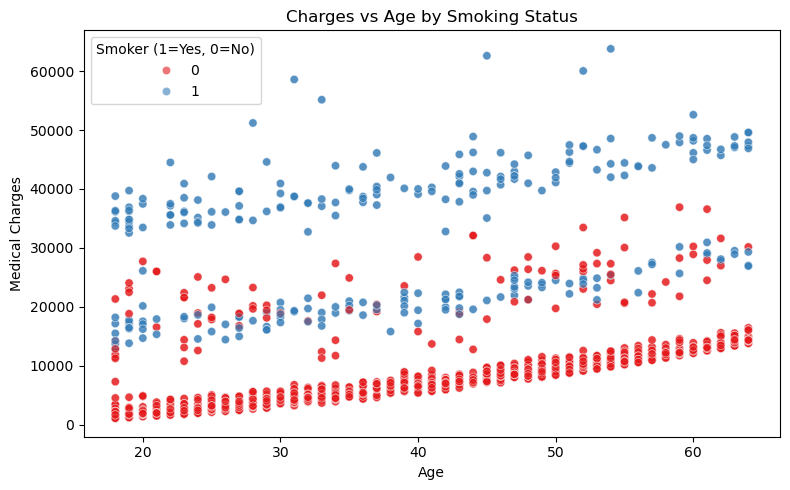

In [33]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='age', y='charges', hue='smoker', data=df, palette='Set1', alpha=0.6)
plt.title("Charges vs Age by Smoking Status")
plt.xlabel("Age")
plt.ylabel("Medical Charges")
plt.legend(title="Smoker (1=Yes, 0=No)")
plt.tight_layout()
plt.show()

In [35]:
df.groupby('smoker')['charges'].mean() # Smoker: 0-No, 1-Yes

smoker
0     8417.874411
1    32223.139764
Name: charges, dtype: float64

##### Interpretation:
- Smokers who have significantly higher charges, especially as age increases
- The gap widens in the 35+ age group

What is the impact of gender and region on charges for smokers?

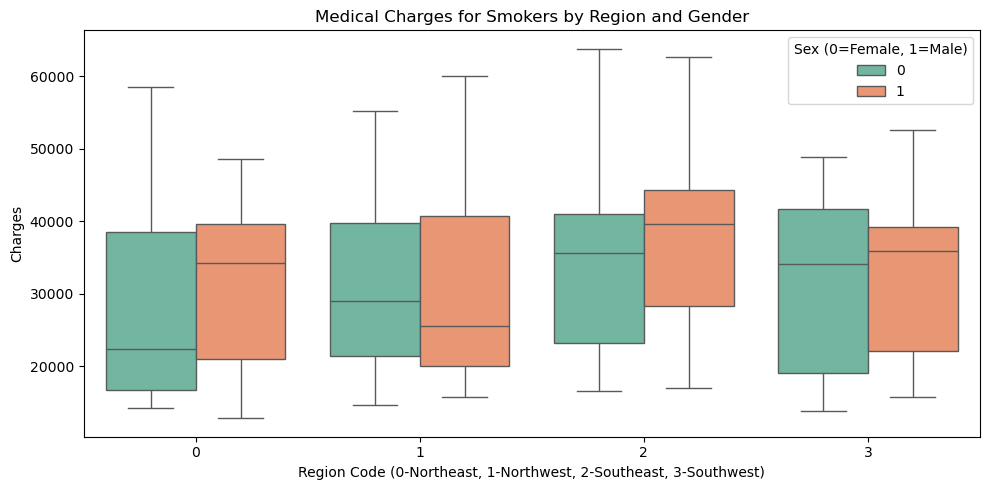

In [37]:
smokers_df = df[df['smoker'] == 1]

plt.figure(figsize=(10, 5))
sns.boxplot(x='region', y='charges', hue='sex', data=smokers_df, palette='Set2')
plt.title("Medical Charges for Smokers by Region and Gender")
plt.xlabel("Region Code (0-Northeast, 1-Northwest, 2-Southeast, 3-Southwest)")
plt.ylabel("Charges")
plt.legend(title="Sex (0=Female, 1=Male)")
plt.tight_layout()
plt.show()

In [39]:
smokers_df.groupby(['region', 'sex'])['charges'].mean()

region  sex
0       0      28032.046398
        1      31097.567329
1       0      29670.824946
        1      30237.771862
2       0      33104.030692
        1      36615.450465
3       0      31687.988430
        1      32710.405068
Name: charges, dtype: float64

##### Interpretation:
- Male smokers in southeast and northeast often show higher charges
- Gender difference appears region-dependent

How do age, BMI, and smoking status together affect insurance cost?

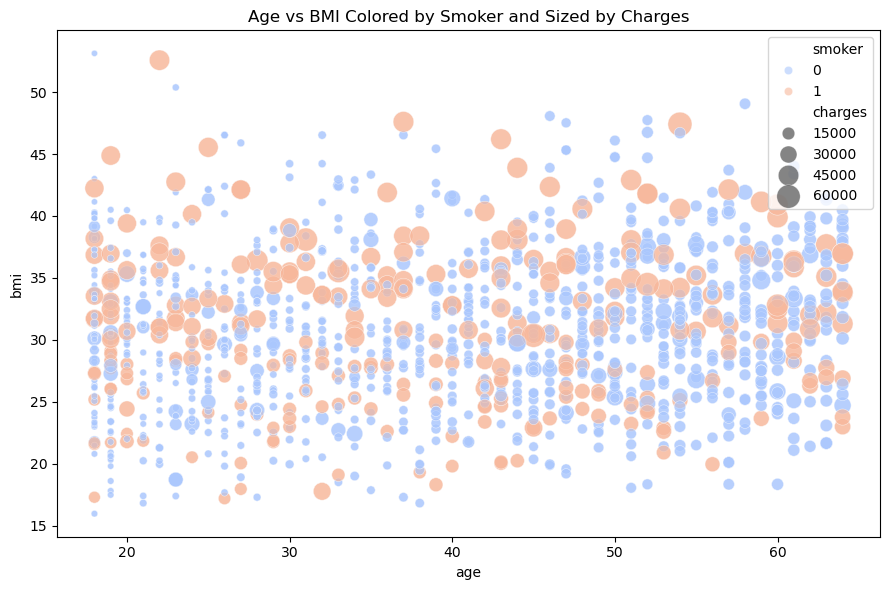

In [41]:
plt.figure(figsize=(9, 6))
sns.scatterplot(
    x='age', y='bmi', size='charges', hue='smoker', data=df,
    sizes=(20, 300), alpha=0.6, palette='coolwarm'
)
plt.title("Age vs BMI Colored by Smoker and Sized by Charges")
plt.tight_layout()
plt.show()

##### Interpretation:
- Smokers with high BMI and age > 40 tend to incur the largest charges
- It reveals a risk group for insurers

Do obese smokers (BMI > 30) pay significantly higher than non-obese non-smokers?

Obese Smokers Avg: ₹41672.02
Non-obese Non-Smokers Avg: ₹7989.38
Difference: ₹33682.64


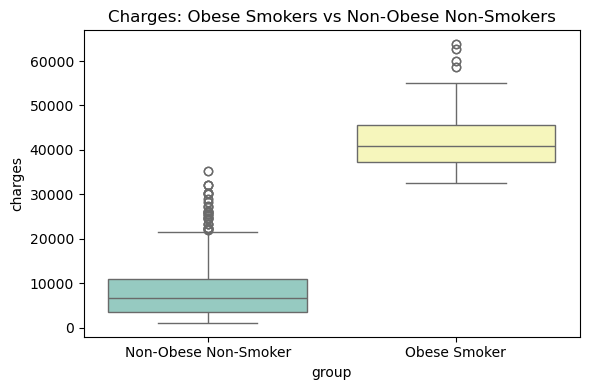

In [43]:
df['obese'] = (df['bmi'] > 30).astype(int)
group1 = df[(df['smoker'] == 1) & (df['obese'] == 1)]  # Obese Smokers
group2 = df[(df['smoker'] == 0) & (df['obese'] == 0)]  # Non-obese Non-Smokers

mean1 = group1['charges'].mean()
mean2 = group2['charges'].mean()
diff = mean1 - mean2
print(f"Obese Smokers Avg: ₹{mean1:.2f}")
print(f"Non-obese Non-Smokers Avg: ₹{mean2:.2f}")
print(f"Difference: ₹{diff:.2f}")

df['group'] = 'Other'
df.loc[(df['smoker'] == 1) & (df['obese'] == 1), 'group'] = 'Obese Smoker'
df.loc[(df['smoker'] == 0) & (df['obese'] == 0), 'group'] = 'Non-Obese Non-Smoker'

plt.figure(figsize=(6, 4))
sns.boxplot(x='group', y='charges', hue='group', data=df[df['group'] != 'Other'], palette='Set3')
plt.title("Charges: Obese Smokers vs Non-Obese Non-Smokers")
plt.tight_layout()
plt.show()

In [45]:
from scipy.stats import ttest_ind
t_stat, p_val = ttest_ind(group1['charges'], group2['charges'], equal_var=False)
print(f"T-statistic: {t_stat:.2f}, p-value: {p_val:.4f}")

T-statistic: 88.72, p-value: 0.0000


##### t-test: (T-statistic was large)
- Group 1: Obese Smokers (smoker == 1 and BMI > 30)
- Group 2: Non-Obese Non-Smokers (smoker == 0 and BMI ≤ 30)
##### Interpretation:
- A p-value < 0.05 means the result is statistically significant
- p = 0.0000 means the likelihood this difference happened by chance is less than 0.01%
- The two groups have significantly different average insurance charges
- Obese smokers pay statistically significantly higher medical insurance charges than non-obese non-smokers
- This suggests BMI and smoking together greatly increase healthcare costs — and are important factors for insurers.

### 4. Outlier Detection:
Are there outliers in the charges column? Who are the individuals paying the highest costs?

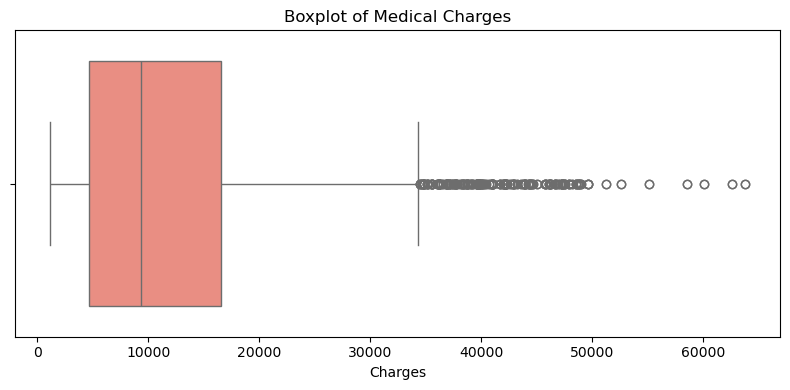

In [47]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['charges'], color='salmon')
plt.title("Boxplot of Medical Charges")
plt.xlabel("Charges")
plt.tight_layout()
plt.show()

In [49]:
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[df['charges'] > upper]
print(f" Outliers in charges: {len(outliers)} records")

 Outliers in charges: 296 records


In [51]:
top5 = df.sort_values(by='charges', ascending=False).head(5)
print(top5[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']])

      age  sex     bmi  children  smoker  region      charges
543    54    0  47.410         0       1       2  63770.42801
1929   54    0  47.410         0       1       2  63770.42801
1300   45    1  30.360         0       1       2  62592.87309
2686   45    1  30.360         0       1       2  62592.87309
2616   52    1  34.485         3       1       1  60021.39897


##### Interpretation:
- These aren't wrong — they likely represent real high-risk individuals (e.g., older smokers with obesity).
- Medical charges often follow a right-skewed distribution, where a small group pays disproportionately high amounts.

Are there extreme BMI values that could skew predictions?

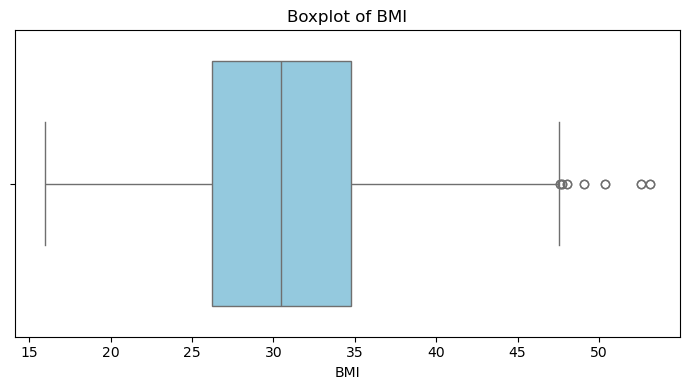

In [53]:
plt.figure(figsize=(7, 4))
sns.boxplot(x=df['bmi'], color='skyblue')
plt.title("Boxplot of BMI")
plt.xlabel("BMI")
plt.tight_layout()
plt.show()

In [55]:
Q1_bmi = df['bmi'].quantile(0.25)
Q3_bmi = df['bmi'].quantile(0.75)
IQR_bmi = Q3_bmi - Q1_bmi
lower_bmi = Q1_bmi - 1.5 * IQR_bmi
upper_bmi = Q3_bmi + 1.5 * IQR_bmi

bmi_outliers = df[df['bmi'] > upper_bmi]
print(f" Extreme BMI outliers: {len(bmi_outliers)} individuals")

 Extreme BMI outliers: 14 individuals


##### Interpretation:
- Medical charges show many high-end outliers — likely due to smoking and age.

## 5. Correlation Analysis:
What is the correlation between numeric features like age, BMI, number of children, and charges?

In [57]:
# Select numeric features
numeric_cols = ['age', 'bmi', 'children', 'charges']
corr_matrix = df[numeric_cols].corr()

# Display correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
               age       bmi  children   charges
age       1.000000  0.113048  0.037574  0.298624
bmi       0.113048  1.000000 -0.001492  0.199846
children  0.037574 -0.001492  1.000000  0.066442
charges   0.298624  0.199846  0.066442  1.000000


Which features have the strongest correlation with the target variable (charges)?

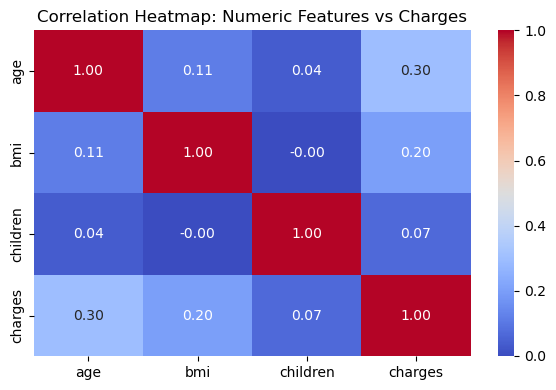

In [59]:
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: Numeric Features vs Charges")
plt.tight_layout()
plt.show()

##### Interpretation:
- Age has the moderate positive correlation with charges among numeric features. Means older individuals tend to pay more

### Keep the Outliers if:
- They represent valid extreme medical scenarios (e.g., high costs due to age, smoking, or chronic illness).
- You're building a general-purpose pricing model — insurance companies need to price for all cases, including high-risk.
- You want realistic predictions for users who may be in that high-cost group.
- Example: A smoker aged 60+ with BMI > 35 might genuinely have charges > 50,000 — and removing them would bias the model for younger, healthier individuals.

### Drop the Outliers if:
- You're building a model for average customers or a specific subgroup (e.g., only non-smokers or age < 40).
- The outliers are data entry errors or have impossible combinations (e.g., age = 200 or negative charges).
- You want to improve model stability during training and avoid overfitting to rare cases.

In [9]:
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn
import xgboost as xgb
import joblib

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Set MLflow tracking URI and experiment
mlflow.set_tracking_uri("http://127.0.0.1:5000/")
mlflow.set_experiment("Medical_Insurance_Cost_Prediction")

# Features and target
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df['charges']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling for models that require it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models dictionary
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.01),
    "DecisionTree": DecisionTreeRegressor(max_depth=5),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42),
    "SVR": SVR(kernel='rbf', C=100, epsilon=0.1),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
}

best_model = None
best_score = float('inf')

for name, model in models.items():
    with mlflow.start_run(run_name=name):
        # Use scaled features for linear and SVR models
        if name in ["LinearRegression", "Ridge", "Lasso", "SVR"]:
            model.fit(X_train_scaled, y_train)
            preds = model.predict(X_test_scaled)
        else:
            model.fit(X_train, y_train)
            preds = model.predict(X_test)

        # Evaluation
        rmse = np.sqrt(mean_squared_error(y_test, preds))
        mae = mean_absolute_error(y_test, preds)
        r2 = r2_score(y_test, preds)

        # MLflow logging
        mlflow.log_param("model_name", name)
        mlflow.log_metric("RMSE", rmse)
        mlflow.log_metric("MAE", mae)
        mlflow.log_metric("R2", r2)
        mlflow.sklearn.log_model(model, "model")

        print(f"{name} -> RMSE: {rmse:.2f}, MAE: {mae:.2f}, R2: {r2:.2f}")

        if rmse < best_score:
            best_score = rmse
            best_model = model
            best_model_name = name

# Register the best model
with mlflow.start_run(run_name="Register_Best_Model") as run:
    mlflow.sklearn.log_model(best_model, "best_model", registered_model_name="BestInsuranceModel")
    mlflow.log_param("best_model", best_model_name)
    mlflow.log_metric("best_RMSE", best_score)

print(f"\nBest model: {best_model_name} with RMSE: {best_score:.2f}")

# Save as Pickle
joblib.dump(best_model, "best_model.pkl")

2025/07/17 16:10:08 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh(<full-path-to-git-executable>)

All git commands will error until this is rectified.

This initial message can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|silent|none|n|0: for no message or exception
    - warn|w|warning|log|l|1: for a warning message (logging level CRITICAL, displayed by default)
    - error|e|exception|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet

2025/07/17 16:10:09 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instea

LinearRegression -> RMSE: 6318.42, MAE: 4167.30, R2: 0.74
🏃 View run LinearRegression at: http://127.0.0.1:5000/#/experiments/142573026440590505/runs/85ebaf7b7d244c21a99c1084c61ea42b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/142573026440590505


2025/07/17 16:10:35 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/17 16:10:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Ridge -> RMSE: 6318.61, MAE: 4167.87, R2: 0.74
🏃 View run Ridge at: http://127.0.0.1:5000/#/experiments/142573026440590505/runs/dfe8b6eaa7e44923b6ac0915818d09a8
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/142573026440590505


2025/07/17 16:10:46 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/17 16:10:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Lasso -> RMSE: 6318.42, MAE: 4167.30, R2: 0.74
🏃 View run Lasso at: http://127.0.0.1:5000/#/experiments/142573026440590505/runs/1e62ac1ad80245b0aec4bc405b43839c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/142573026440590505


2025/07/17 16:10:58 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/17 16:11:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


DecisionTree -> RMSE: 4668.19, MAE: 2535.47, R2: 0.86
🏃 View run DecisionTree at: http://127.0.0.1:5000/#/experiments/142573026440590505/runs/0428255573f54b188fb8eda90137d6c6
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/142573026440590505


2025/07/17 16:11:11 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/17 16:11:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


RandomForest -> RMSE: 2752.19, MAE: 1305.56, R2: 0.95
🏃 View run RandomForest at: http://127.0.0.1:5000/#/experiments/142573026440590505/runs/0941b99727774fe08c3db196793c0484
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/142573026440590505


2025/07/17 16:11:23 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/17 16:11:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


XGBoost -> RMSE: 4263.94, MAE: 2234.49, R2: 0.88
🏃 View run XGBoost at: http://127.0.0.1:5000/#/experiments/142573026440590505/runs/f23ed594bf3c4ecdb91676687198b766
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/142573026440590505


2025/07/17 16:11:36 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/17 16:11:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


SVR -> RMSE: 9232.74, MAE: 4427.41, R2: 0.44
🏃 View run SVR at: http://127.0.0.1:5000/#/experiments/142573026440590505/runs/b12ded2ba4e3420e88f0de23a0eaac24
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/142573026440590505


2025/07/17 16:11:48 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/17 16:11:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/07/17 16:11:59 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


GradientBoosting -> RMSE: 4034.02, MAE: 2122.94, R2: 0.89
🏃 View run GradientBoosting at: http://127.0.0.1:5000/#/experiments/142573026440590505/runs/edf88421d4db4e00ba21a31a14d7959b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/142573026440590505


2025/07/17 16:12:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'BestInsuranceModel' already exists. Creating a new version of this model...
2025/07/17 16:12:12 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: BestInsuranceModel, version 4
Created version '4' of model 'BestInsuranceModel'.


🏃 View run Register_Best_Model at: http://127.0.0.1:5000/#/experiments/142573026440590505/runs/4c212d25c4cb406287a8b7b0bf544cab
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/142573026440590505

Best model: RandomForest with RMSE: 2752.19


['best_model.pkl']

In [10]:
import mlflow.pyfunc

model_name = "BestInsuranceModel"
model_version = 1

model = mlflow.pyfunc.load_model(model_uri=f"models:/{model_name}/{model_version}")

In [11]:
from mlflow.tracking import MlflowClient

client = MlflowClient()
model_name = "BestInsuranceModel"
version = 1  # version you want to mark

# Set alias "production" on version 1
client.set_registered_model_alias(model_name, "production", version)
model = mlflow.pyfunc.load_model("models:/BestInsuranceModel@production")

# If you want to load the latest model in the production stage, use:
# model = mlflow.pyfunc.load_model(model_uri="models:/BestInsuranceModel@production")

In [12]:
%%writefile insurance_app.py
import streamlit as st
import pandas as pd
import numpy as np
import mlflow.pyfunc
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib

warnings.filterwarnings("ignore", message="Error displaying widget")

# Load Pickle file
model = joblib.load("best_model.pkl")

# Streamlit App
st.set_page_config(page_title="Medical Insurance Estimator", layout="wide")
st.title(" Medical Insurance Cost Estimator")

menu = st.sidebar.radio("Navigation", ["Introduction", "EDA Insights", "Prediction"])

# Introduction
if menu == "Introduction":
    st.markdown("""
    ### Project Overview
    This app predicts **medical insurance charges** based on age, gender, BMI, smoker status, and region.

    **Use Cases:**
    - Insurance companies can personalize premiums.
    - Individuals can plan or compare insurance costs.
    - Healthcare consultants can estimate out-of-pocket expenses.
    """)

# EDA
elif menu == "EDA Insights":
    st.markdown("###  Exploratory Data Analysis (EDA)")
    df = pd.read_csv("medical_insurance.csv")

    analysis_type = st.selectbox("Select Analysis Type", ["Univariate Analysis", "Bivariate Analysis", "Multivariate Analysis", "Outlier Detection", "Correlation Analysis"])

    if analysis_type == "Univariate Analysis":
        feature = st.selectbox("Choose a feature", ["What is the distribution of medical insurance charges?", "What is the age distribution of the individuals?", "How many people are smokers vs non-smokers?", "What is the average BMI in the dataset?", "Which regions have the most number of policyholders?"])

        if feature == "What is the distribution of medical insurance charges?":
            st.subheader("Distribution of Charges")
            fig, ax = plt.subplots()
            sns.histplot(df['charges'], bins=30, kde=True, ax=ax, color='maroon')
            ax.set_title("Distribution of Medical Insurance Charges")
            ax.set_xlabel("Charges")
            ax.set_ylabel("Frequency")
            ax.grid(True)
            st.pyplot(fig)

        elif feature == "What is the age distribution of the individuals?":
            st.subheader("Age Distribution")
            fig, ax = plt.subplots()
            sns.histplot(df['age'], bins=30, kde=True, ax=ax, color='skyblue')
            ax.set_title("Age Distribution of Individuals")
            ax.set_xlabel("Age")
            ax.set_ylabel("Count")
            st.pyplot(fig)

        elif feature == "How many people are smokers vs non-smokers?":
            st.subheader("Smoker Count")
            fig, ax = plt.subplots()
            sns.countplot(x='smoker', data=df, hue='smoker', legend=False, palette='Set2', ax=ax)
            ax.set_title("Smokers vs Non-Smokers")
            ax.set_ylabel("Count")
            st.pyplot(fig)

        elif feature == "What is the average BMI in the dataset?":
            st.subheader("BMI Distribution")
            mean_bmi = df['bmi'].mean()
            st.write(f" Average BMI: **{mean_bmi:.2f}**")
            
            fig, ax = plt.subplots()
            sns.boxplot(x=df['bmi'], color='lightblue', ax=ax)
            ax.set_title("Distribution of BMI")
            ax.set_xlabel("BMI")
            ax.legend()
            st.pyplot(fig)

        elif feature == "Which regions have the most number of policyholders?":
            st.subheader("Number of Policyholders by Region")
            fig, ax = plt.subplots()
            sns.countplot(x='region', data=df, order=df['region'].value_counts().index, hue='region', legend=False, palette='pastel', ax=ax)
            ax.set_title("Policyholders in Each Region")
            ax.set_xlabel("Region")
            ax.set_ylabel("Count")
            st.pyplot(fig)

    elif analysis_type == "Bivariate Analysis":
        feature_pair = st.selectbox("Choose analysis", [
            "How do charges vary with age?", 
            "Is there a difference in average charges between smokers and non-smokers?", 
            "Does BMI impact insurance charges?", 
            "Do men or women pay more on average?", 
            "Is there a correlation between the number of children and the insurance charges?"])

        if feature_pair == "How do charges vary with age?":
            fig, ax = plt.subplots()
             # sns.scatterplot(x='age', y='charges', data=df, ax=ax)
            sns.regplot(x='age', y='charges', data=df, scatter_kws={'alpha': 0.4}, line_kws={'color': 'red'})
            ax.set_title("Charges vs Age")
            ax.set_xlabel("Age")
            ax.set_ylabel("Medical Charge")
            st.pyplot(fig)

        elif feature_pair == "Is there a difference in average charges between smokers and non-smokers?":
            fig, ax = plt.subplots()
            sns.boxplot(x='smoker', y='charges', data=df, ax=ax)
            ax.set_title("Medical Charges: Smokers vs Non-Smokers")
            st.pyplot(fig)

        elif feature_pair == "Does BMI impact insurance charges?":
            fig, ax = plt.subplots()
            # sns.scatterplot(x='bmi', y='charges', data=df, ax=ax)
            sns.regplot(x='bmi', y='charges', data=df, scatter_kws={'alpha': 0.3}, line_kws={'color': 'green'})
            ax.set_title("Charges vs BMI")
            ax.set_xlabel("BMI")
            ax.set_ylabel("Charges")
            st.pyplot(fig)

        elif feature_pair == "Do men or women pay more on average?":
            gender_charges = df.groupby('sex')['charges'].mean()
            abs_diff = abs(gender_charges[1] - gender_charges[0])
            st.write(f" **Average difference in charges (Male - Female): ₹{abs_diff:.2f}**")
            fig, ax = plt.subplots()
            sns.boxplot(x='sex', y='charges', data=df, ax=ax)
            ax.set_title("Medical Charges: Male vs Female")
            st.pyplot(fig)

        elif feature_pair == "Is there a correlation between the number of children and the insurance charges?":
            corr = df['children'].corr(df['charges'])
            st.write(f" Correlation between number of children and charges: **{corr:.4f}**")
            fig, ax = plt.subplots()
            sns.stripplot(x='children', y='charges', data=df, jitter=0.25, palette='coolwarm', ax=ax)
            ax.set_title("Distribution of Charges by Children Count")
            st.pyplot(fig)

    elif analysis_type == "Multivariate Analysis":
        option = st.selectbox("Choose multivariate scenario", [
            "How does smoking status combined with age affect medical charges?",
            "What is the impact of gender and region on charges for smokers?",
            "How do age, BMI, and smoking status together affect insurance cost?",
            "Do obese smokers (BMI > 30) pay significantly higher than non-obese non-smokers?"])

        if option == "How does smoking status combined with age affect medical charges?":
            fig, ax = plt.subplots()
            sns.scatterplot(x='age',y='charges',hue='smoker',data=df,palette='Set1',alpha=0.6)
            ax.set_title("Charges vs Age by Smoking Status")
            ax.set_xlabel("Age")
            ax.set_ylabel("Medical Charges")
            ax.legend(title="Smoker (1=Yes, 0=No)")
            st.pyplot(fig)

        elif option == "What is the impact of gender and region on charges for smokers?":
            smokers_df = df[df['smoker'] == 1]
            st.write("### Average Charges for Smokers by Region and Gender")
            grouped_avg = smokers_df.groupby(['region', 'sex'])['charges'].mean().unstack()
            st.dataframe(grouped_avg.style.format("₹{:.2f}"))
            fig, ax = plt.subplots(figsize=(10,5))
            sns.boxplot(x='region', y='charges', hue='sex', data=df[df['smoker']=='yes'], ax=ax)
            ax.set_title("Gender & Region vs Charges (Smokers only)")
            ax.set_xlabel("Region")
            ax.set_ylabel("Medical Charges")
            ax.legend(title="Smoker (1=Yes, 0=No)")
            st.pyplot(fig)

        elif option == "How do age, BMI, and smoking status together affect insurance cost?":
            fig, ax = plt.subplots()
            sns.scatterplot(x='age', y='bmi', hue='smoker', size='charges', sizes=(20, 300), data=df, ax=ax)
            ax.set_title("Age vs BMI Colored by Smoker and Sized by Charges")
            st.pyplot(fig)

        elif option == "Do obese smokers (BMI > 30) pay significantly higher than non-obese non-smokers?":
            # Step 1: Add obesity flag
            df['obese'] = (df['bmi'] > 30).astype(int)
            
            # Step 2: Define groups
            group1 = df[(df['smoker'] == 1) & (df['obese'] == 1)]  # Obese Smokers
            group2 = df[(df['smoker'] == 0) & (df['obese'] == 0)]  # Non-obese Non-Smokers
            
            # Step 3: Calculate means and difference
            mean1 = group1['charges'].mean()
            mean2 = group2['charges'].mean()
            diff = mean1 - mean2

            # Step 4: Display metrics
            st.write(f"### Charges Comparison")
            st.write(f"**Obese Smokers Avg**: ₹{mean1:.2f}")
            st.write(f"**Non-obese Non-Smokers Avg**: ₹{mean2:.2f}")
            st.write(f"**Difference**: ₹{diff:.2f}")

            # Step 5: Create group labels for plotting
            df['group'] = 'Other'
            df.loc[(df['smoker'] == 1) & (df['obese'] == 1), 'group'] = 'Obese Smoker'
            df.loc[(df['smoker'] == 0) & (df['obese'] == 0), 'group'] = 'Non-Obese Non-Smoker'
            # df['obese_smoker'] = ((df['bmi'] > 30) & (df['smoker'] == 'yes')).astype(int)
            fig, ax = plt.subplots()
            sns.boxplot(x='group',y='charges',hue='group',data=df[df['group'] != 'Other'],palette='Set3')
            ax.set_title("Charges: Obese Smokers vs Non-Obese Non-Smokers")
            st.pyplot(fig)

    elif analysis_type == "Outlier Detection":
        option = st.selectbox("Choose outlier detection scenario", [
            "Are there outliers in the charges column?",
            "Who are the individuals paying the highest costs?",
            "Are there extreme BMI values that could skew predictions?"])

        if option == "Are there outliers in the charges column?":
            st.subheader("Outlier Detection for Charges")
            Q1 = df['charges'].quantile(0.25)
            Q3 = df['charges'].quantile(0.75)
            IQR = Q3 - Q1
            upper = Q3 + 1.5 * IQR
            outliers = df[df['charges'] > upper]
            st.write(f"Number of outliers in charges: {len(outliers)}")

            fig, ax = plt.subplots()
            sns.boxplot(x=df['charges'], ax=ax, color='lightgreen')
            ax.set_title("Boxplot of Charges (Outliers)")
            ax.set_xlabel("Charges")
            st.pyplot(fig)
        
        elif option == "Who are the individuals paying the highest costs?":
            st.subheader("Top 5 Most Expensive Cases")
            # Top 5 highest charges
            top5 = df.sort_values(by='charges', ascending=False).head(5)
            # Display selected columns
            st.write("### Top 5 Highest Medical Charges")
            st.dataframe(top5[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']])
            
        elif option == "Are there extreme BMI values that could skew predictions?":
            st.subheader("Extreme BMI Values")
            # Calculate IQR and bounds for BMI
            Q1_bmi = df['bmi'].quantile(0.25)
            Q3_bmi = df['bmi'].quantile(0.75)
            IQR_bmi = Q3_bmi - Q1_bmi
            lower_bmi = Q1_bmi - 1.5 * IQR_bmi
            upper_bmi = Q3_bmi + 1.5 * IQR_bmi

            # Identify BMI outliers
            bmi_outliers = df[df['bmi'] > upper_bmi]
            st.write(f" **Extreme BMI outliers**: {len(bmi_outliers)} individuals")
            fig, ax = plt.subplots()
            sns.boxplot(x=df['bmi'], color='skyblue')
            ax.set_title("Boxplot of BMI")
            ax.set_xlabel("BMI")
            st.pyplot(fig)

    elif analysis_type == "Correlation Analysis":
        option = st.selectbox("Choose Correlation Analysis", [
            "What is the correlation between numeric features like age, BMI, number of children, and charges?",
            "Which features have the strongest correlation with the target variable (charges)?"])

        if option == "What is the correlation between numeric features like age, BMI, number of children, and charges?":
            st.subheader("Correlation with Charges")
            numeric_cols = ['age', 'bmi', 'children', 'charges']
            corr_matrix = df[numeric_cols].corr()
            st.write("### Correlation Matrix (Numeric Features)")
            st.dataframe(corr_matrix.style.background_gradient(cmap='coolwarm').format("{:.2f}"))

        elif option == "Which features have the strongest correlation with the target variable (charges)?":
            fig, ax = plt.subplots()
            sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
            ax.set_title("Correlation Heatmap")
            st.pyplot(fig)

# Prediction
elif menu == "Prediction":
    st.markdown("### Predict Your Medical Insurance Cost")

    with st.form("input_form"):
        col1, col2 = st.columns(2)

        with col1:
            age = st.slider("Age", 18, 100, 30)
            sex = st.selectbox("Gender", ["male", "female"])
            bmi = st.number_input("BMI (Body Mass Index)", min_value=10.0, max_value=60.0, value=25.0, step=0.1)

        with col2:
            children = st.selectbox("Number of Children", [0, 1, 2, 3, 4, 5])
            smoker = st.selectbox("Smoker?", ["yes", "no"])
            region = st.selectbox("Region", ["southeast", "southwest", "northeast", "northwest"])

        submitted = st.form_submit_button("Predict")

    if submitted:
        sex_encoded = 1 if sex == "male" else 0
        smoker_encoded = 1 if smoker == "yes" else 0
        region_encoded = {"northeast": 0, "northwest": 1, "southeast": 2, "southwest": 3}[region]

        input_df = pd.DataFrame([{
            "age": age,
            "sex": sex_encoded,
            "bmi": bmi,
            "children": children,
            "smoker": smoker_encoded,
            "region": region_encoded
        }])

        try:
            prediction = model.predict(input_df)
            result = prediction[0] if isinstance(prediction, (np.ndarray, list, pd.Series)) else prediction
            st.success(f" Estimated Annual Insurance Cost: ₹{result:,.2f}")

            original_input = pd.DataFrame([{
                "age": age,
                "sex": sex,
                "bmi": bmi,
                "children": children,
                "smoker": smoker,
                "region": region
            }])

            with st.expander("View Your Input Details"):
                st.write(original_input)

        except Exception as e:
            st.error(f"❌ Prediction failed: {e}")

Overwriting insurance_app.py


In [13]:
!streamlit run insurance_app.py

^C
